In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [3]:
df = pd.read_csv('Data/GOOGL_2006-01-01_to_2018-01-01.csv',header=0,parse_dates=[0],index_col=[0])
df.head()

# header=0: We must specify the header information at row 0.
# parse_dates=[0]: We give the function a hint that data in the first column contains dates that need to be parsed. This argument takes a list, so we provide it a list of one element, which is the index of the first column.
# index_col=0: We hint that the first column contains the index information for the time series.
# squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [5]:
df.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [6]:
df.shape

(3019, 6)

In [7]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

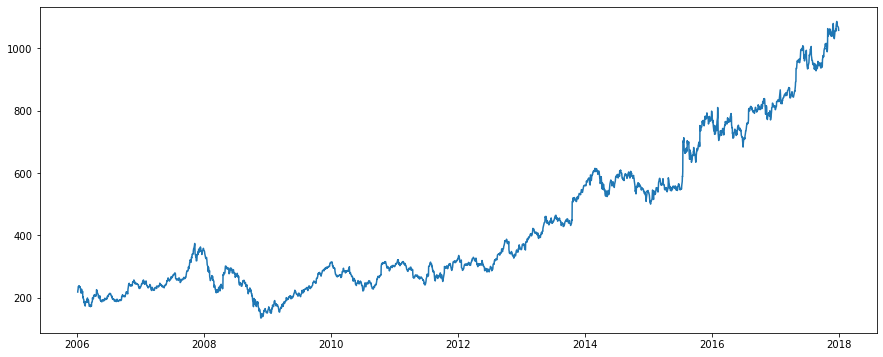

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df['High'])
plt.show()

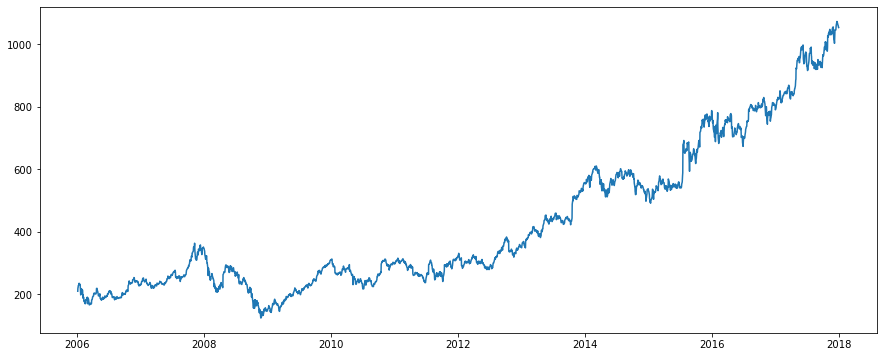

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df['Low'])
plt.show()

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


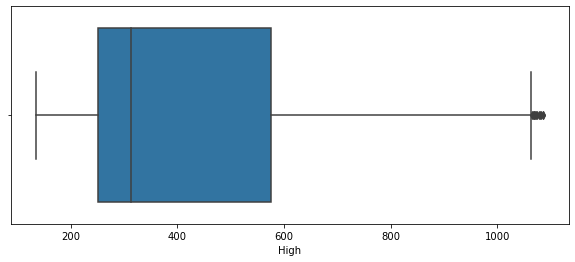

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(df['High'])
plt.show()

In [12]:
df['High'].describe()

count    3019.000000
mean      431.835618
std       237.514087
min       134.820000
25%       250.190000
50%       312.810000
75%       575.975000
max      1086.490000
Name: High, dtype: float64

In [13]:
q1 = np.percentile(df['High'],25,interpolation='midpoint')
q3 = np.percentile(df['High'],75,interpolation='midpoint')
iqr = q3-q1
lower_fence = q1 - 1.5 * iqr
higher_fence = q3 + 1.5 * iqr

In [14]:
lower_fence,higher_fence

(-238.4875, 1064.6525000000001)

In [15]:
outer_values = []
for value in df['High']:
    if value > higher_fence:
        outer_values.append(value)

In [16]:
outer_values

[1073.04,
 1080.0,
 1067.08,
 1075.25,
 1086.49,
 1084.98,
 1081.24,
 1077.52,
 1071.72,
 1068.86,
 1068.27,
 1064.84]

In [17]:
len(outer_values)

12

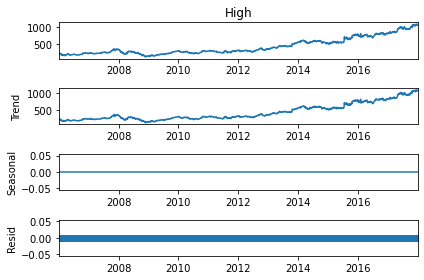

In [11]:
seasonal_decompose(df['High'],period = 1).plot();

In [12]:
roll_high = df['High'].rolling(7).mean()

In [21]:
roll_high.head(8)

Date
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
2006-01-09           NaN
2006-01-10           NaN
2006-01-11    230.618571
2006-01-12    233.430000
Name: High, dtype: float64

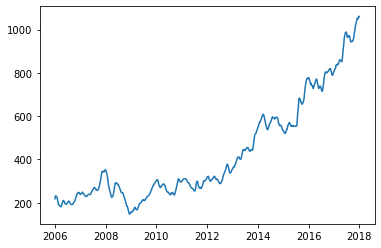

In [13]:
plt.plot(df['High'].rolling(window='30D').mean())
plt.show()

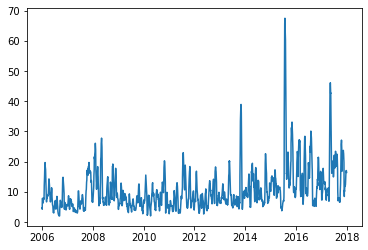

In [14]:
plt.plot(df['High'].rolling(window='30D').std())
plt.show()

In [15]:
adfuller(df['High'])

(1.1516455250307074,
 0.995634164931128,
 2,
 3016,
 {'1%': -3.4325200511877854,
  '5%': -2.862498789206885,
  '10%': -2.567280388383968},
 19527.074020525768)

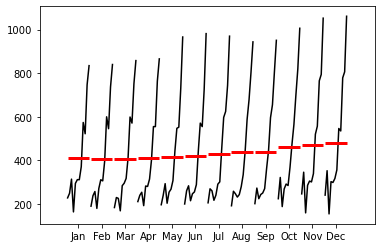

In [19]:
month_plot(df['High'].resample(rule='MS').mean());

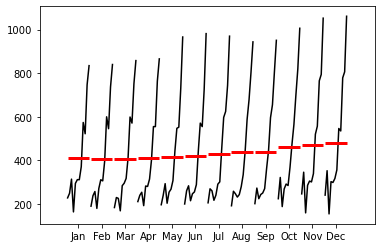

In [21]:
month_plot(df['High'].resample(rule='M').mean());

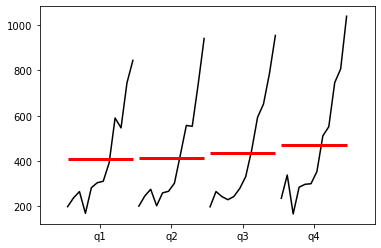

In [20]:
quarter_plot(df["High"].resample('Q').mean());

We can see the p value is way greater than 0.05 stating it is not-stationary.

In [25]:
log_high = df['High'].apply(lambda x : np.log(x))

In [26]:
seasonal_decompose(log_high,freq=365).plot()
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [27]:
adfuller(log_high)

(-0.10462237646188875,
 0.9489761761862444,
 2,
 3016,
 {'1%': -3.4325200511877854,
  '5%': -2.862498789206885,
  '10%': -2.567280388383968},
 -16336.162230894814)

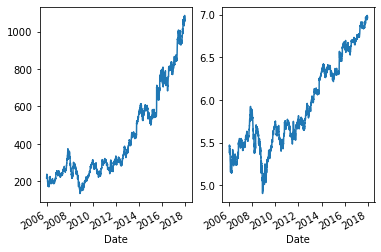

In [28]:
ax1=plt.subplot(121)
df['High'].plot(ax=ax1)
ax2=plt.subplot(122)
log_high.plot(ax=ax2)
plt.show()

In [29]:
diff_high = df['High'].diff().dropna()

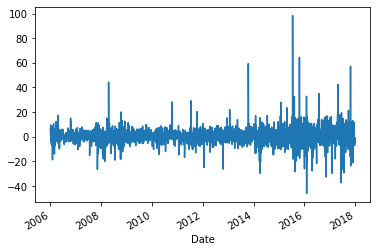

In [30]:
diff_high.plot()
plt.show()

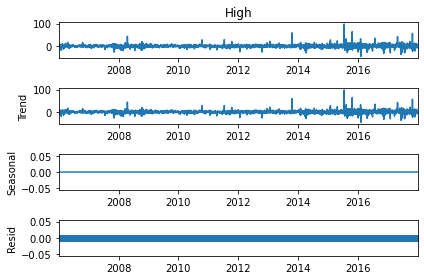

In [41]:
seasonal_decompose(diff_high,period = 1).plot()
plt.show()

In [32]:
adfuller(diff_high)

(-37.89240702599741,
 0.0,
 1,
 3016,
 {'1%': -3.4325200511877854,
  '5%': -2.862498789206885,
  '10%': -2.567280388383968},
 19520.28427013077)

The P-value is now less than the 0.05 stating now the data is stationary.

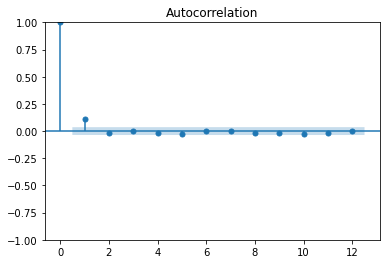

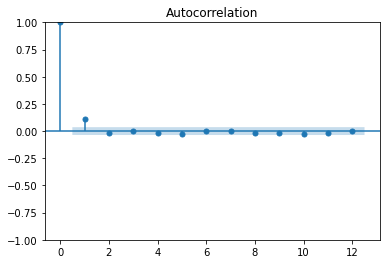

In [33]:
plot_acf(diff_high,lags=12)

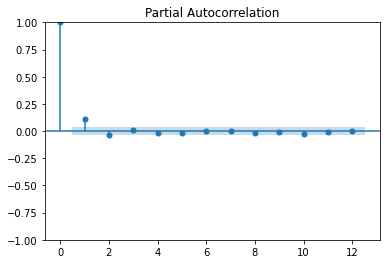

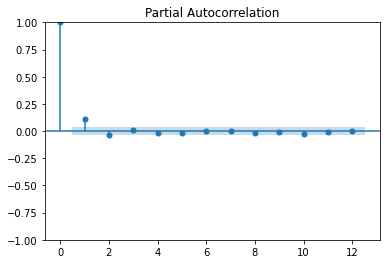

In [34]:
plot_pacf(diff_high,lags=12)

In [35]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [36]:
new_df = df['High']
new_df.head()


Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
Name: High, dtype: float64

In [37]:
type(new_df)

pandas.core.series.Series

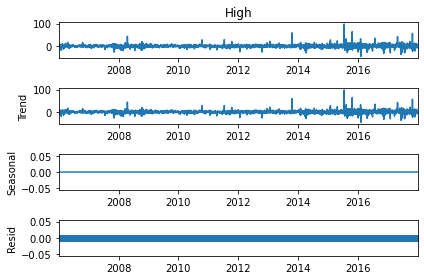

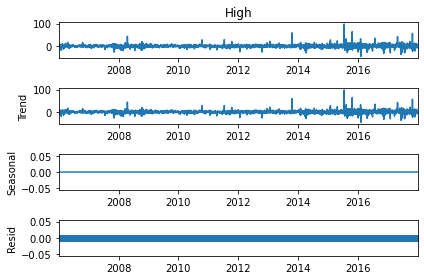

In [42]:
seasonal_decompose(diff_high,period = 1).plot()

In [43]:
decompose = seasonal_decompose(new_df,period = 1)
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

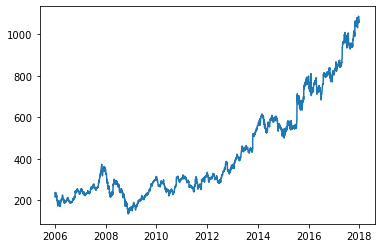

In [44]:
plt.plot(trend)
plt.show()

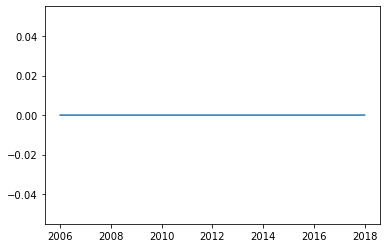

In [45]:
plt.plot(seasonal)
plt.show()

In [46]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [47]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [48]:
df['2006':'2007'].tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2007-12-24,347.84,350.72,346.88,350.72,1628440,GOOGL
2007-12-26,349.84,356.97,349.45,355.78,2530377,GOOGL
2007-12-27,353.89,358.36,350.72,350.72,2943242,GOOGL
2007-12-28,352.82,354.33,348.62,351.62,2562699,GOOGL
2007-12-31,349.63,351.60,345.64,346.09,2376478,GOOGL


In [49]:
df.loc['2016-01-01':].head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2016-01-04,762.20,762.20,747.54,759.44,3352912,GOOGL
2016-01-05,764.10,769.20,755.65,761.53,2260795,GOOGL
2016-01-06,750.37,765.73,748.00,759.33,2410301,GOOGL
2016-01-07,746.49,755.31,735.28,741.00,3156563,GOOGL
2016-01-08,747.80,750.12,728.92,730.91,2375348,GOOGL


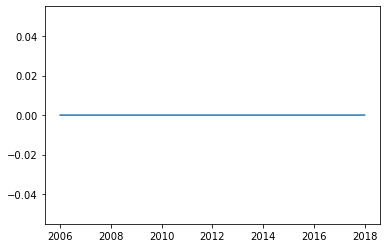

In [51]:
diff_decompose = seasonal_decompose(diff_high,period = 1)
plt.plot(diff_decompose.seasonal)
plt.show()

https://spureconomics.com/interpreting-acf-and-pacf-plots/

From the above pacf and acf plots we can say the order of the arima can be (1,1,1)

In [52]:
diff_high.shape

(3018,)

In [53]:
diff_high.head()

Date
2006-01-04    6.65
2006-01-05    1.30
2006-01-06    9.49
2006-01-09    1.45
2006-01-10   -1.58
Name: High, dtype: float64

In [54]:
train = df['High'].iloc[:2000]
test = df["High"].iloc[2000:]

In [59]:
model = ARIMA(df['High'],order=(1,1,1))
arima = model.fit()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
pred = arima.predict(start=2000,end=3017)

In [61]:
pred.shape

(1018,)

In [62]:
df['High'].tail()

Date
2017-12-22    1071.72
2017-12-26    1068.86
2017-12-27    1068.27
2017-12-28    1064.84
2017-12-29    1058.05
Name: High, dtype: float64

In [63]:
pred.head()

Date
2013-12-13    541.574670
2013-12-16    538.420382
2013-12-17    537.863504
2013-12-18    541.279486
2013-12-19    543.158585
Name: predicted_mean, dtype: float64

In [68]:
test.head()

Date
2013-12-13    538.68
2013-12-16    537.88
2013-12-17    540.92
2013-12-18    543.02
2013-12-19    546.54
Name: High, dtype: float64

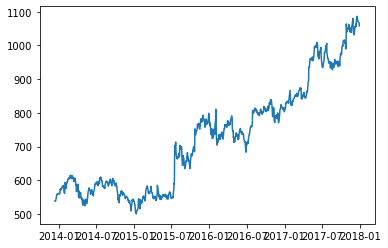

In [66]:
plt.plot(df['High'].iloc[2000:])
#plt.plot(pred)
plt.show()

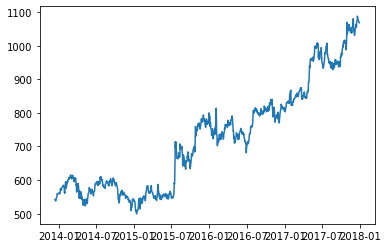

In [67]:
plt.plot(pred)

In [65]:
arima.forecast(10)

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3019    1057.374587
3020    1057.495658
3021    1057.473956
3022    1057.477846
3023    1057.477149
3024    1057.477274
3025    1057.477251
3026    1057.477255
3027    1057.477254
3028    1057.477255
Name: predicted_mean, dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt